In [2]:
import h5py
import numpy as np
# import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

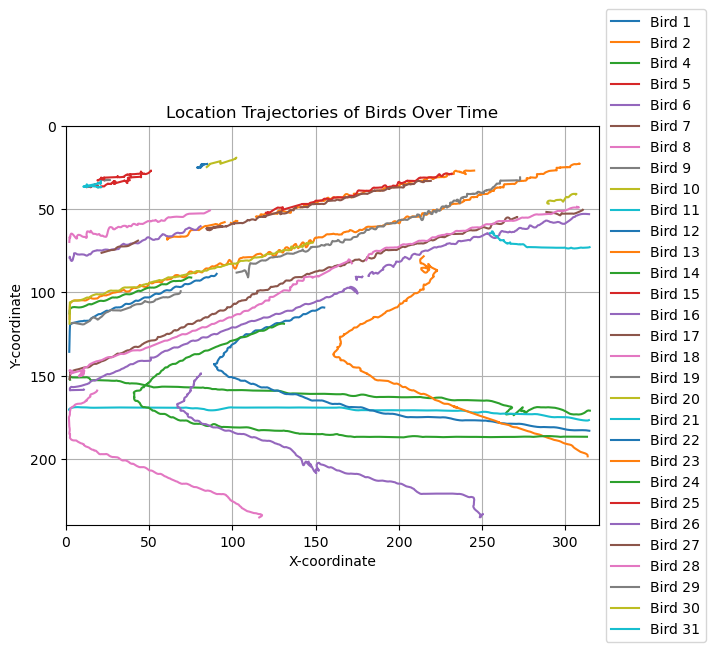

In [8]:
# Plot some example trajectories
filename = '/Users/emily/data/FLIRcam/ForTracking/use_me/six_tracked_videos/20221215122046189_-5_25_bone.avi.hand_checked.h5'
with h5py.File(filename, "r") as f:
        dset_names = list(f.keys())
        locations = f["tracks"][:].T
        node_names = [n.decode() for n in f["node_names"][:]]
# Create a single plot
plt.figure(figsize=(10, 6))

# Loop through each bird to plot its trajectory
for bird in range(np.shape(locations)[3]):
    # Extract x and y coordinates for the bird across all timesteps
    x_coordinates = locations[:, 0, 0, bird]
    y_coordinates = locations[:, 0, 1, bird]

    non_nan_count = np.sum(~np.isnan(x_coordinates))
    if non_nan_count > 30:
        plt.plot(x_coordinates, y_coordinates, label=f'Bird {bird+1}')

# Setting labels, title, limits, and legend
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.title("Location Trajectories of Birds Over Time")
plt.xlim((0, 320))
plt.ylim((0, 240))
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', 'box')  # Consistent aspect ratio

# Show plot
plt.tight_layout()
plt.show()

'hello'

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '2400x2400', '-pix_fmt', 'rgba', '-r', '30', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-b', '1800k', '-metadata', 'artist=Me', '-y', '/Users/emily/code/collaborative-intelligence/tmp_files/20221229124126908_30_bone.avi.hand_checked.h5_trajectories.mp4']' returned non-zero exit status 255.

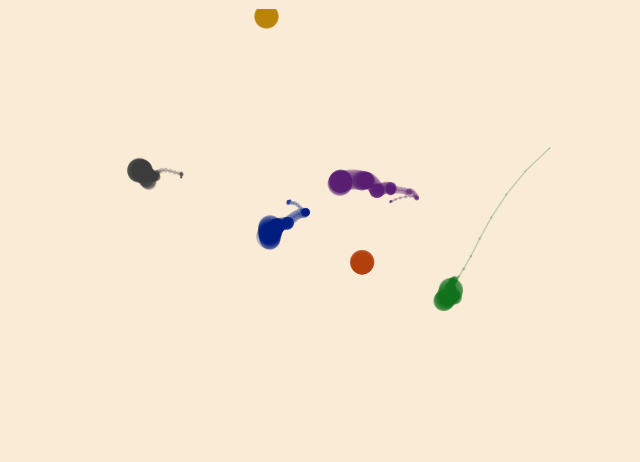

In [3]:
# load each of the analysis files, make a video
import real_data_plotting
from importlib import reload
reload(real_data_plotting)

folder_from_colab = '/Users/emily/data/FLIRcam/ForTracking/use_me/six_tracked_videos'
h5_files = [f for f in os.listdir(folder_from_colab) if f.endswith('checked.h5') or f.endswith('cleaned.h5')]

# iterate over .h5 files in folder
for file in h5_files:
    filename = os.path.join(folder_from_colab, file)
    with h5py.File(filename, "r") as f:
        dset_names = list(f.keys())
        locations = f["tracks"][:].T
        node_names = [n.decode() for n in f["node_names"][:]]
        
    # Put data into dataframe format
    data_list = []

    # Iterate over the locations array
    for t in range(locations.shape[0]):
        for bird in range(locations.shape[3]):
            x = locations[t, 0, 0, bird]
            y = locations[t, 0, 1, bird]
            # Check if x and y are not NaN before appending
            if not (np.isnan(x) or np.isnan(y)):
                data_list.append({'x': x, 'y': y, 'time': t, 'bird': bird})


    # Convert to pandas DataFrame
    df = pd.DataFrame(data_list)

    save_dir = '/Users/emily/code/collaborative-intelligence/tmp_files'
    # save to csv
    save_path_csv = os.path.join(save_dir,os.path.split(filename)[1] +'_df.csv')
    df.to_csv(save_path_csv)

    save_path_video = os.path.join(save_dir,os.path.split(filename)[1] +'_trajectories.mp4')
    real_data_plotting.generate_bird_trajectories_video(df, save_path_video, fps=30, frames=None, max_history=100)
    print(filename)


